# Decision Tree - Drug 200

## Basic EDA

In [65]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [66]:
# read file using read_csv function
df = pd.read_csv('./dataset/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [67]:
# summary statistics for numeric data types
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [68]:
# summary statistics for object data types
df.describe(include=['O'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [69]:
# data type of each column
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [70]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [71]:
# number of rows and columns
df.shape

(200, 6)

In [72]:
# count of duplicate rows
df[df.duplicated()].shape

(0, 6)

## Decision Tree

In [73]:
# count of unique values for Drug column in the Dataframe
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

### # we are transforming the data into numbers because the DecisionTreeClassifier algorithm works with numnerical data and cannot handle categorical data directly

In [74]:
# importing 'OneHotEncoder' to convert categorical variables into numerical values
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder
ohe_encoder = OneHotEncoder(sparse=False)

# Apply the OneHotEncoder to the 'Sex', 'BP', 'Cholesterol' column and get the names of the new to the 'Sex', 'BP', 'Cholesterol' columns
one_hot_encoded_Sex = ohe_encoder.fit_transform(df[['Sex']])
col_names_Sex = ohe_encoder.get_feature_names_out(['Sex'])

one_hot_encoded_BP = ohe_encoder.fit_transform(df[['BP']])
col_names_BP = ohe_encoder.get_feature_names_out(['BP'])

one_hot_encoded_Cholesterol = ohe_encoder.fit_transform(df[['Cholesterol']])
col_names_Cholesterol = ohe_encoder.get_feature_names_out(['Cholesterol'])

C:\Users\rahul bhutekar\ds_class\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\rahul bhutekar\ds_class\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\rahul bhutekar\ds_class\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
col_names_Sex, col_names_BP, col_names_Cholesterol

(array(['Sex_F', 'Sex_M'], dtype=object),
 array(['BP_HIGH', 'BP_LOW', 'BP_NORMAL'], dtype=object),
 array(['Cholesterol_HIGH', 'Cholesterol_NORMAL'], dtype=object))

In [76]:
# creating a new DataFrame with the newly generated values
df_encoded_Sex = pd.DataFrame(one_hot_encoded_Sex, columns=col_names_Sex)
df_encoded_BP = pd.DataFrame(one_hot_encoded_BP, columns=col_names_BP)
df_encoded_Cholesterol = pd.DataFrame(one_hot_encoded_Cholesterol, columns=col_names_Cholesterol)

In [77]:
# concatenate the newly generated encoded values to the original DataFrame and dropping the original OBJECT type field 'Payment_Behaviour' 
df = pd.concat([df, df_encoded_Sex, df_encoded_BP, df_encoded_Cholesterol], axis=1)
df = df.drop(['Sex', 'BP', 'Cholesterol'], axis=1)

In [78]:
# preprocessing provides collection of functions and classes for preprocessing and transforming data before it is used in machine learning models
from sklearn import preprocessing

# using LabelEncoder to convert Drug into numbers as this will be our Target variable
label_encoder = preprocessing.LabelEncoder()
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [79]:
df['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [80]:
# display first few rows of a Datafrome. Default is 5
df.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,4,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,13.093,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,10.114,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,7.798,3,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,18.043,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [81]:
# move the target column 'Drug' to the end of the DataFrame
df = pd.concat([df.drop('Drug', axis=1), df['Drug']], axis=1)
df.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4


In [82]:
# iloc allows us to access specific rows and columns in a Dataframe by using integer indices
df.iloc[:, 0:9]

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,16,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,52,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,23,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [83]:
x = df.iloc[:,0:9]
y = df.iloc[:,9]
x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,16,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,52,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,23,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [84]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

In [85]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 9), (40, 9), (160,), (40,))

In [87]:
x_test

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
135,74,11.939,0.0,1.0,0.0,1.0,0.0,0.0,1.0
73,41,22.905,1.0,0.0,0.0,0.0,1.0,0.0,1.0
157,53,22.963,0.0,1.0,0.0,1.0,0.0,1.0,0.0
28,39,22.697,1.0,0.0,0.0,1.0,0.0,0.0,1.0
23,48,15.036,1.0,0.0,0.0,1.0,0.0,1.0,0.0
79,32,10.840,1.0,0.0,0.0,1.0,0.0,0.0,1.0
54,68,10.189,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
114,20,9.281,1.0,0.0,0.0,0.0,1.0,0.0,1.0
124,53,12.495,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [88]:
y_test

135    3
73     4
157    4
28     4
23     4
79     3
54     1
3      3
114    3
124    1
180    4
111    3
182    3
64     1
9      4
68     4
35     3
45     3
89     4
47     2
177    4
126    4
142    1
7      2
12     4
32     3
181    3
136    1
105    3
178    4
48     4
190    4
112    3
81     3
95     3
43     3
158    2
187    0
99     4
65     4
Name: Drug, dtype: int32

### Building Decision Tree Classifier using Entropy as a Criterion

In [89]:
# import the decisiontree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on the training data
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6666666666666666, 0.9, 'x[1] <= 14.829\nentropy = 1.962\nsamples = 160\nvalue = [22, 11, 13, 39, 75]'),
 Text(0.5555555555555556, 0.7, 'x[4] <= 0.5\nentropy = 1.816\nsamples = 85\nvalue = [22, 11, 13, 39, 0]'),
 Text(0.3333333333333333, 0.5, 'x[6] <= 0.5\nentropy = 0.811\nsamples = 52\nvalue = [0, 0, 13, 39, 0]'),
 Text(0.2222222222222222, 0.3, 'x[7] <= 0.5\nentropy = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\nentropy = 0.918\nsamples = 33\nvalue = [22, 11, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.777777777777

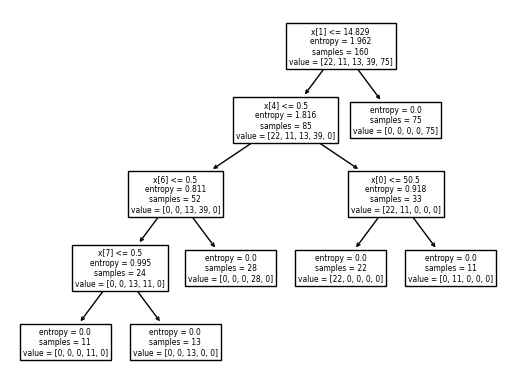

In [90]:
# visualizing decision tree
from sklearn import tree
tree.plot_tree(model)

[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.829\nentropy = 1.962\nsamples = 160\nvalue = [22, 11, 13, 39, 75]\nclass = drugC'),
 Text(0.5555555555555556, 0.7, 'BP_HIGH <= 0.5\nentropy = 1.816\nsamples = 85\nvalue = [22, 11, 13, 39, 0]\nclass = drugB'),
 Text(0.3333333333333333, 0.5, 'BP_NORMAL <= 0.5\nentropy = 0.811\nsamples = 52\nvalue = [0, 0, 13, 39, 0]\nclass = drugB'),
 Text(0.2222222222222222, 0.3, 'Cholesterol_HIGH <= 0.5\nentropy = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]\nclass = drugA'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]\nclass = drugB'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]\nclass = drugA'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]\nclass = drugB'),
 Text(0.7777777777777778, 0.5, 'age <= 50.5\nentropy = 0.918\nsamples = 33\nvalue = [22, 11, 0, 0, 0]\nclass = drugY'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples =

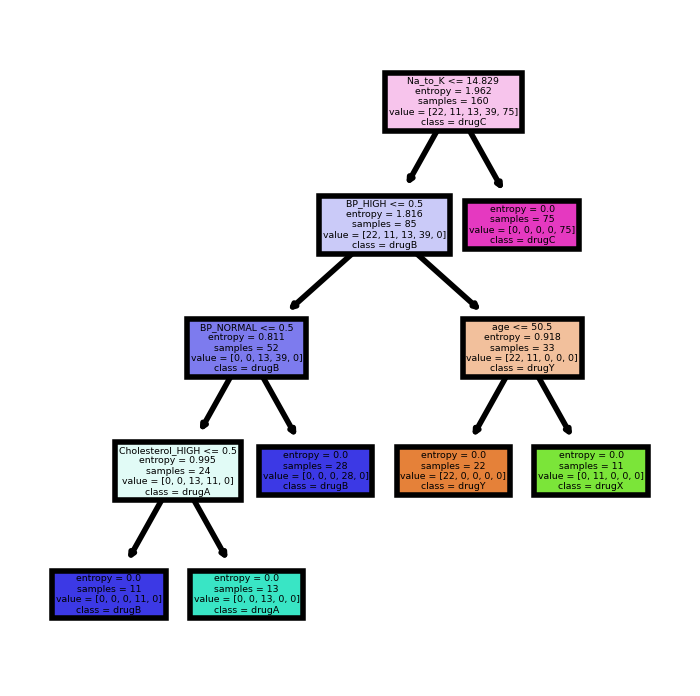

In [91]:
# visualizing decision tree with different parameters

fn = ['age', 'Na_to_K', 'sex_f', 'sex_m', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']
cn = ['drugY', 'drugX', 'drugA', 'drugB', 'drugC']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)

### Prediction on Test data

In [92]:
# make predictions on the test data

preds = model.predict(x_test)
preds

array([3, 4, 4, 4, 4, 3, 1, 3, 3, 1, 4, 3, 3, 1, 4, 4, 3, 3, 4, 2, 4, 4,
       1, 2, 4, 3, 3, 1, 3, 4, 4, 4, 3, 3, 3, 3, 2, 0, 4, 4])

In [93]:
# convert to Pandas Series and get value counts

pd.Series(preds).value_counts()

4    16
3    15
1     5
2     3
0     1
Name: count, dtype: int64

### Crosstab : Way to understand the two way table between predicted vs actual

In [94]:
pd.crosstab(y_test, preds, rownames=['Drug (actual)'], colnames=['Drug (predicted)'], margins=True, margins_name='Total')

Drug (predicted),0,1,2,3,4,Total
Drug (actual),,,,,,
0,1,0,0,0,0,1
1,0,5,0,0,0,5
2,0,0,3,0,0,3
3,0,0,0,15,0,15
4,0,0,0,0,16,16
Total,1,5,3,15,16,40


### Accuracy of the above model

In [95]:
from sklearn.metrics import accuracy_score

# evaluating the model's accuracy
accuracy = accuracy_score(y_test, preds, normalize=True)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [96]:
#element-wise comparison between the elements of the preds array and the y_test array

mean_accuracy = np.mean(preds == y_test)
print(f"Accuracy: {mean_accuracy}")

Accuracy: 1.0


In [97]:
# plotting the preds and y_test in the table for better understanding of how the values are compared and represented in the crosstab method

x_test['preds'] = preds
x_test['y_test'] = y_test
x_test

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,preds,y_test
135,74,11.939,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3,3
73,41,22.905,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4,4
157,53,22.963,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4,4
28,39,22.697,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4,4
23,48,15.036,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4,4
79,32,10.840,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3,3
54,68,10.189,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3,3
114,20,9.281,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3
124,53,12.495,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
